# Estructura de la red
La red de bicicletas puede ser considerada como una estructura de procesamiento de informacion donde los nodos son las unidades de procesamiento y el camino que los vincula, la conexión.

Estructura de la red:
    
    1) NODOS: Estaciones
    2) CONEXION (edge): Camino | Recorrido | Calles
    3) PESOS (intensidad de la conexion): cantidad de usuarios? | tiempo de uso? | distancia en km?
    4) DIRECCIONALIDAD: Dirigido o No dirigido?  Podria pensarse como dirigido o dirigido reciproco con self-loops
    5) TAMAÑO
    

### Metricas de la red y preguntas relevantes

1) Por cuantos nodos esta compuesta la red y cuantos edges los vinculan?

2) Como es la direccionalidad de la red: 
    2.1_Las bicicletas suelen dejarse en la misma estacion de la que se retiran?(self-loop)
    2.2_Cuales son las estaciones que mas conexiones tienen entre si?

3) Degree centrality distribution de los nodos:
    3.1_Cual es la estacion con mayor cantidad de conexiones?
    
4) Betweenness centrality distribution de los nodos:
    4.1_Hay alguna estacion que permita clusterizar recorridos?
    
5) Cual es el grado promedio de la red? El promedio de relaciones que existe entre los nodos de la red (<k> = L/N)
    
6) Cual es el flujo maximo de pasajeros que podria soportar la red de bicicletas?

7) Cual es el camino mas corto entre n y k estaciones?

8) Diametro de la red. Cual es la distancia promedio que se recorre en la red de bicicletas de caba?

In [2]:
# Plot the degree distribution de la red de bicicletas
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

In [ ]:
# Plot the betweennes centrality distribution de la red de bicicletas
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

In [ ]:
# Representar los ejes con un matrixplot

In [ ]:
# Cual es la estacion con mayor degree centrality?

In [ ]:
# Se pueden recomendar conexiones entre estaciones?

# ESTRUCTURANDO LA RED DE BICICLETAS

3.1. Movilidad y Transporte en Áreas Urbanas (citar el articulo!)

En los espacios urbanos en general, el transporte público masivo se convierte en un
elemento clave para las administraciones -en términos de demanda potencial-, debido a la
necesidad cotidiana de la población para desplazarse. 

Implicancias de su utilizacion:

  * Acción a favor de la cohesión social y espacial:
     1. Permite el desplazamiento de personas de distintos recursos
     2. Facilitan la circulación y reducen la congestión en las calles
     3. Promueve un menor uso del automóvil

In [2]:
# librerias 
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
# Cargamos datasets de recorridos
df15 = pd.read_csv('data/bici15_cdn.csv')
df16 = pd.read_csv('data/bici16_cdn.csv')
df17 = pd.read_csv('data/bici17_cdn.csv')
df18 = pd.read_csv('data/bici18_cdn.csv')
df19 = pd.read_csv('data/bici19_cdn.csv')

In [4]:
# Cargamos el shapefile de estaciones
estaciones = gpd.read_file('data/estaciones_de_bicicletas.shp')
estaciones = estaciones.to_crs(epsg='4326')

In [5]:
# librerias 
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# ESTA PARTE QUEDA PARA DESPUES

In [8]:
# Instanciamos un grafo direccionado
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [9]:
# Esto me parece que seria pensando a las personas como nodo
# Funcion para crear edges en una red de transporte

def vinculos_e_nodos(df, columna1, columna2):
    '''
    Devuelve los extremos conectados por un vinculo (edge)
    '''
    
    origen = df[columna1]
    destino = df[columna2]
    
    vinculados = zip(origen,destino)
    
    return list(vinculados)

In [10]:
edges = vinculos_e_nodos(df18, 'bici_estacion_origen', 'bici_estacion_destino')

In [11]:
# Creamos una lista de edges (estacion_n, estacion_k)
D.add_edges_from(edges)

In [12]:
len(D.edges())

56940

In [13]:
len(D.nodes())

18657

In [ ]:
# LLEGA HASTA ACA

In [6]:
# Se crea una funcion para generar el grafo de la red de transporte
def graphmaker(df, origen, destino):
    '''
    Devuelve un grafo compuesto por estaciones(nodos) y recorridos(vinculos) para cada dataframe.
    ...
    Argumentos:
    
    df = dataframe de recorridos
    origen = Serie del dataframe referenciando la estacion de origen del grafo
    destino = Serie del dataframe referenciando la estacion de destino del grafo
    '''
    agrupado = df.groupby([origen,destino]).size().reset_index(name='recorridos')
    agrupado.columns = ['origen','destino','recorridos']
    bicigrafo = nx.from_pandas_edgelist(agrupado,'origen','destino','recorridos')
    return bicigrafo

In [7]:
# Aplicamos la funcion para cada dataset y asi obtenemos el grafo de la red de bicicletas de cada año

# bicigrafo 2015
b15 = graphmaker(df15,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

# bicigrafo 2016
b16 = graphmaker(df16,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

# bicigrafo 2017
b17 = graphmaker(df17,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

# bicigrafo 2015
b18 = graphmaker(df18,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

# bicigrafo 2019
b19 = graphmaker(df19,'bici_nombre_estacion_origen','bici_nombre_estacion_destino')

In [8]:
# 1) Cantidad de nodos(estaciones) y ejes(recorridos) de cada dataset

n15, e15 = len(b15.nodes()), len(b15.edges())
n16, e16 = len(b16.nodes()), len(b16.edges())
n17, e17 = len(b17.nodes()), len(b17.edges())
n18, e18 = len(b18.nodes()), len(b18.edges())
n19, e19 = len(b19.nodes()), len(b19.edges())

In [9]:
# librerias
import plotly_express as px
import seaborn as sns

In [10]:
# Evolucion de la cantidad de estaciones y recorridos realizados entre 2015 y 2019 (considerar que 2019 llega hasta febrero)

evolucion = pd.DataFrame({'Año':['2015','2016','2017','2018','2019'], 'Nodos':[n15,n16,n17,n18,n19], 'Ejes':[e15,e16,e17,e18,e19]})

In [11]:
evolucion

Año  Nodos   Ejes
0  2015     66   1697
1  2016    102   4465
2  2017    202  19169
3  2018    199  19575
4  2019    170  11495

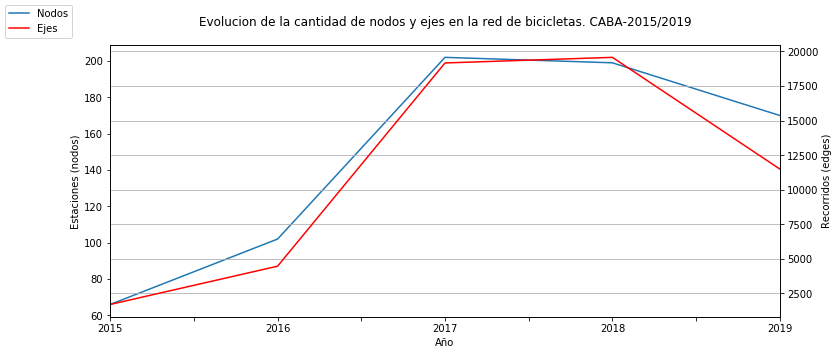

In [12]:
# Vemos como evolucionaron la cantidad de nodos y edges
ax = evolucion.plot(x="Año", y="Nodos", figsize=(12,5),legend=False)
ax2 = ax.twinx()
evolucion.plot(x="Año", y="Ejes", ax=ax2, figsize=(12,5), legend=False, color="r")
ax.figure.legend(loc='upper left')
ax.set_ylabel("Estaciones (nodos)")
ax2.set_ylabel("Recorridos (edges)")
plt.title('Evolucion de la cantidad de nodos y ejes en la red de bicicletas. CABA-2015/2019', y=1.05)
plt.grid();

In [13]:
print('Entre 2016 y 2017, los nodos (estaciones) de la red de bicicletas de la Ciudad de Buenos Aires crecio un %s%%' % round((n17/n16-1)*100,2)) 

Entre 2016 y 2017, los nodos (estaciones) de la red de bicicletas de la Ciudad de Buenos Aires crecio un 98.04%


In [14]:
print('Por su parte, en el mismo periodo, la cantidad de recorridos (edges) de la red de bicicletas de la Ciudad de Buenos Aires crecio un %s%%'% round((e17/e16-1)*100,2))

Por su parte, en el mismo periodo, la cantidad de recorridos (edges) de la red de bicicletas de la Ciudad de Buenos Aires crecio un 329.32%


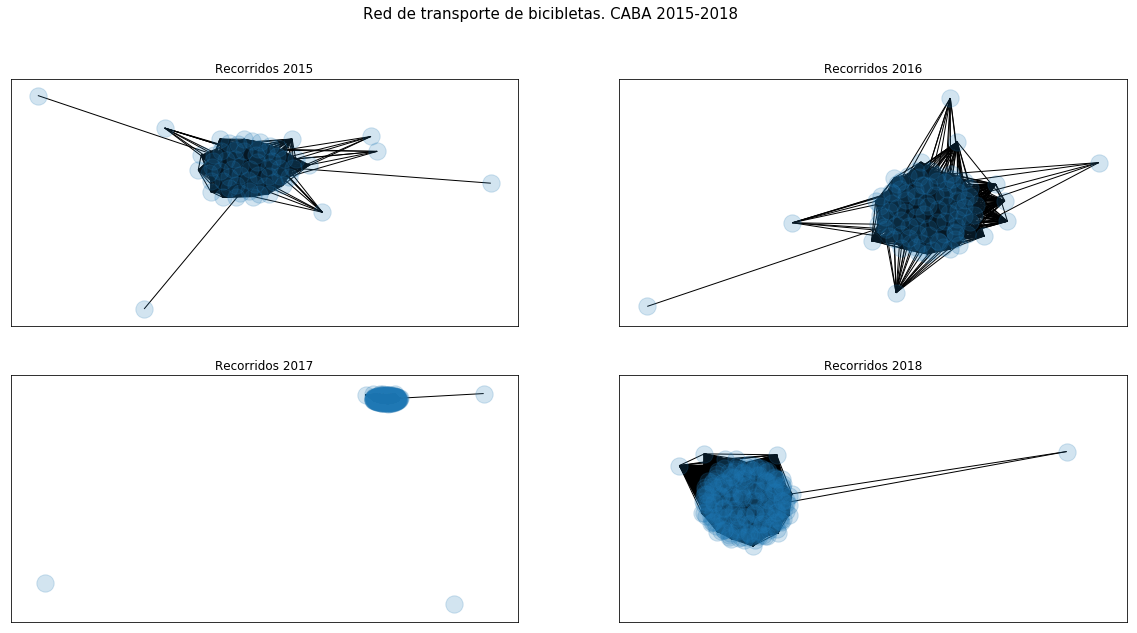

In [15]:
# Graficamos los grafos de la red de bicicletas por año
plt.figure(figsize=(20,10))

# bicigrafo2015
plt.subplot(2,2,1)
pos = nx.spring_layout(b15)
nx.draw_networkx_nodes(b15, pos, alpha=0.2, node_linewidth = 0.0,size=75)
nx.draw_networkx_edges(b15, pos, style='solid', aplha=0.1)
plt.title('Recorridos 2015')

# bicigrafo2016
plt.subplot(2,2,2)
pos2 = nx.spring_layout(b16)
nx.draw_networkx_nodes(b16, pos2, alpha=0.2, node_linewidth = 0.0,size=75)
nx.draw_networkx_edges(b16, pos2, style='solid', aplha=0.1)
plt.title('Recorridos 2016')

# bicigrafo2017
plt.subplot(2,2,3)
pos3 = nx.spring_layout(b17)
nx.draw_networkx_nodes(b17, pos3, alpha=0.2, node_linewidth = 0.0,size=75)
nx.draw_networkx_edges(b17, pos3, style='solid', aplha=0.1)
plt.title('Recorridos 2017')

# bicigrafo2018
plt.subplot(2,2,4)
pos4 = nx.spring_layout(b18)
nx.draw_networkx_nodes(b18, pos3, alpha=0.2, node_linewidth = 0.0,size=75)
nx.draw_networkx_edges(b18, pos3, style='solid', aplha=0.1)
plt.title('Recorridos 2018')

plt.suptitle('Red de transporte de bicibletas. CABA 2015-2018', fontsize=15);

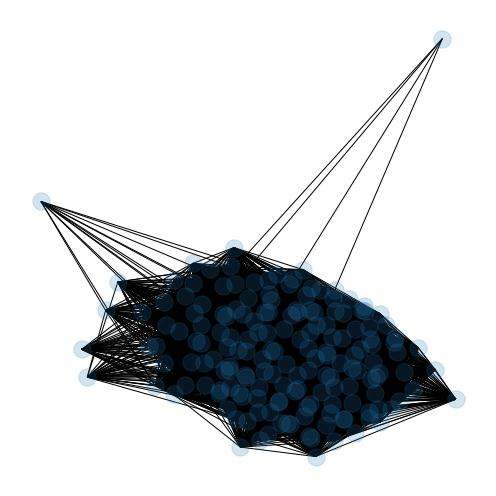

In [16]:
# Graficamos el bicigrafo19 aparte (tiene menos meses)
plt.figure(figsize=(7,7))
pos = nx.spring_layout(b19)
nx.draw_networkx_nodes(b19, pos, alpha=0.2, node_linewidth = 0.0,size=75)
nx.draw_networkx_edges(b19, pos, style='solid', aplha=0.1)
plt.axis('off')
plt.tight_layout()
plt.show()

## Medidas de conexion de la red

        La conectividad o cohesión, determina el grado de comunicación recíproca entre los vértices, y es el grado de integración o interconexión que presenta una red para su funcionamiento interno. Parte del principio básico de que cuantos más arcos tenga el grafo, mayor será el grado de conectividad. En realidad, indica la mayor o menor complejidad estructural de la red, lo cual está ligado directamente al número de nodos, arcos y a su disposición espacial (Seguí Pons y Petrus Bey, 1991 en UNNE!).

        El interés por esta clase de medidas,obedece a que el incremento de las conexiones a través del tiempo significa una mayor cohesión espacial para el territorio donde se emplaza la red

1) Índice Beta de Kanskyexpresala: β = a / n

       Logra medir como aumenta la conectividad cuando se incrementa el número de arcos de un grafo (Seguí Pons y Petrus Bey, 1991). Las redes de transporte de estructura muy compleja asumen valores de índice β más elevados, mientras las redes cuya estructura es más sencilla, tendrán valores más bajos(Potrykowsky, 1984).


In [17]:
# Creamos funcion para el indice Beta
def cohesion(grafo):
    '''
    Devuelve el grado de conectividad de una red
    '''
    a = len(grafo.edges())
    n = len(grafo.nodes())
    beta = round(a/n, 2)
    return beta

In [18]:
# Creamos una lista con todos los grafos que queremos incluir en el indice
grafos = [b15,b16,b17,b18,b19]

# Calculamos el nivel de cohesion de la red y almacenamos el resultado en una lista
indice1 = [cohesion(i) for i in grafos]

In [19]:
indice1

[25.71, 43.77, 94.9, 98.37, 67.62]

2) El Índice Gamma: ɣ = a/(n*(n-1)/2)

       Relaciona el número de arcos existentes y el número máximo que puede existir dentro de un grafo determinado, teniendo en cuenta la cantidad de nodos de una red.  


In [20]:
# Funcion para calcular Beta max
def cohesion_max(grafo):
    '''
    Devuelve el porcentaje respecto del maximo posible de beta. Es una medida complementaria de cohesion
    '''
    a = len(grafo.edges())
    n = len(grafo.nodes())
    beta_max= a/(n*(n-1)/2)
    return beta_max    

In [21]:
# Calculamos el nivel de cohesion respecto del maximo posible de Beta y almacenamos el resultado en una lista
indice2 = [cohesion_max(i) for i in grafos]

In [22]:
indice2

[0.7911421911421911,
 0.8668219763152786,
 0.944239200039407,
 0.9936043855641845,
 0.8002088409328229]

3) El Número Ciclomático: μ = a – (n – 1) – g

       Determina la cantidad de circuitos que existen dentro de un grafo. Entendiendo por circuito, cada una de las múltiples maneras que existen para ir desde un nodo hasta el mismo, sin tener que pasar dos veces por el mismo arco. Se calcula restando el número total de arcos (a) al número de nodos necesario para formar un árbol (n-1), restándose además los grafos inconexos(g)que puedan existir (Bosque Sendra, 1992)

In [23]:
# Funcion para calcular el node degree de cada grafo. Se puede usar la misma estructura para pasar otras labels y valores a los nodos.

def grado_nodo(grafo):
    '''
    Funcion para calcular el grado de cada nodos y pasarselo como 'label/value'
    '''
    
    for n, d in grafo.nodes(data=True):
        
        # Calcula el grado para cada nodo
        grafo.node[n]['degree'] = nx.degree(grafo,n)

In [24]:
# Aplicamos la funcion a todos los nodos con una lista por comprension
[grado_nodo(i) for i in grafos]

[None, None, None, None, None]

In [25]:
# Creamos una funcion para calcular el nro. ciclomatico de cada grafo
def ciclomatico(grafo):
    '''
    Devuelve el Numero Ciclomatico de un grafo
    '''
    a = len(grafo.edges())
    n = len(grafo.nodes())
    # Filtra por condicion del label del nodo y devuelve la cantidad de True (en este caso, nodos solitarios)
    g = len([n for n,d in grafo.nodes(data=True) if d['degree'] <1])
    u = a - (n - 1) - g
    return u

In [26]:
indice3 = [ciclomatico(i) for i in grafos]

In [27]:
indice3

[1632, 4364, 18968, 19377, 11326]

4) El Índice Alfa: α = (μ / 2 ∙ n – 5) ∙ 100

        Relaciona el número de circuitos observados en el grafo (µ) y los circuitos que existirán en caso de tratarse de un grafo completo. Se trata de una comparacion respecto del número máximo posible de circuitos en la red. Es un indicador de la complejidad de la red, que se obtiene del ratio entre el Número Ciclomático y el máximo posible de circuitos.

In [28]:
# Creamos una funcion para el indice alpha
def alpha(grafo):
    
    def ciclomatico(grafo):
        a = len(grafo.edges())
        n = len(grafo.nodes())
        # Filtra por condicion del label del nodo y devuelve la cantidad de True (en este caso, nodos solitarios)
        g = len([n for n,d in grafo.nodes(data=True) if d['degree'] <1])
        u = a - (n - 1) - g
        return u, n
    u = ciclomatico(grafo)[0]
    n = ciclomatico(grafo)[1]
    a = u/(2*n-5)
    return a

In [29]:
indice4 = [alpha(i) for i in grafos]

In [30]:
indice4

[12.850393700787402,
 21.92964824120603,
 47.53884711779449,
 49.30534351145038,
 33.808955223880595]

In [31]:
#Indices de cohesion
indices = pd.DataFrame({'Año':['2015','2016','2017','2018','2019'],'Beta':indice1, 'Beta_max': indice2, 'Ciclo': indice3, 'Alpha': indice4})

In [32]:
indices

Año   Beta  Beta_max  Ciclo      Alpha
0  2015  25.71  0.791142   1632  12.850394
1  2016  43.77  0.866822   4364  21.929648
2  2017  94.90  0.944239  18968  47.538847
3  2018  98.37  0.993604  19377  49.305344
4  2019  67.62  0.800209  11326  33.808955

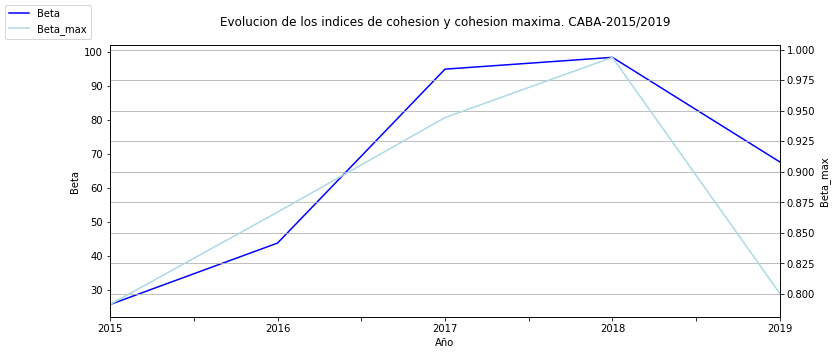

In [33]:
# Vemos como los indices de cohesion
ax = indices.plot(x="Año", y="Beta", figsize=(12,5),legend=False,color='Blue')
ax2 = ax.twinx()
indices.plot(x="Año", y="Beta_max", ax=ax2, figsize=(12,5), legend=False, color="lightblue")
ax.figure.legend(loc='upper left')
ax.set_ylabel("Beta")
ax2.set_ylabel("Beta_max")
plt.title('Evolucion de los indices de cohesion y cohesion maxima. CABA-2015/2019', y=1.05)
plt.grid();

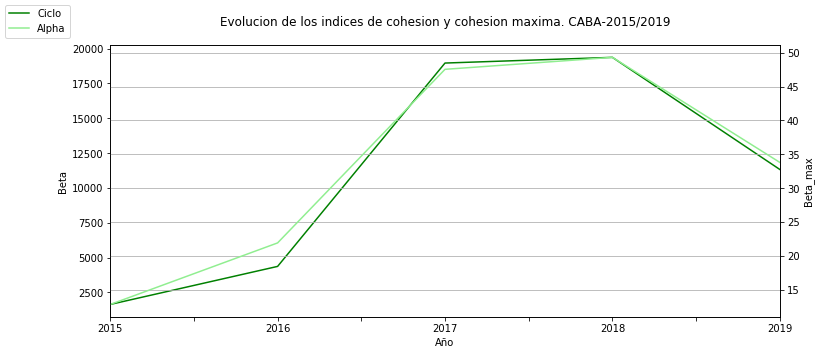

In [34]:
# Vemos como evolucionaron la cantidad de nodos y edges
ax = indices.plot(x="Año", y="Ciclo", figsize=(12,5),legend=False,color='Green')
ax2 = ax.twinx()
indices.plot(x="Año", y="Alpha", ax=ax2, figsize=(12,5), legend=False, color="lightgreen")
ax.figure.legend(loc='upper left')
ax.set_ylabel("Beta")
ax2.set_ylabel("Beta_max")
plt.title('Evolucion de los indices de cohesion y cohesion maxima. CABA-2015/2019', y=1.05)
plt.grid();

## Medidas de Accesibilidad y Centralidad

         Un tema importante para analizar es la accesibilidad topológica de cada nodo en la red, teniendo en cuenta la cantidad de arcos que es necesario atravesar para llegar a un nodo de referencia desde cualquier otro. De esta forma los nodos adquieren una jerarquía en función de la facilidad de acceso desde cada uno a los demás.

In [35]:
import nxviz as nv

### Matriz de conectividad 

...una tabla simétrica donde se indica con 1 las relaciones directas entre nodos y con 0 la ausencia de una conexión directa.

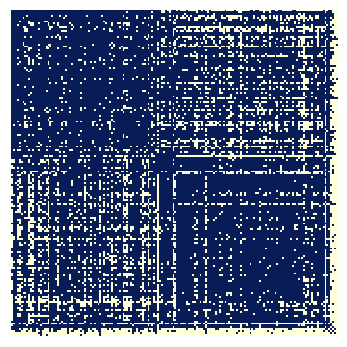

In [36]:
m = nv.MatrixPlot(b19)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

In [37]:
# Notebook interesante de eric ma para visualizar redes
#http://ericmjl.github.io/Network-Analysis-Made-Simple/bonus-3-matrices-instructor.html

''

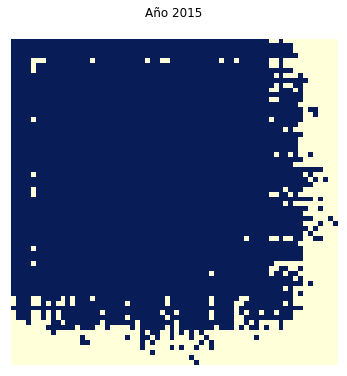

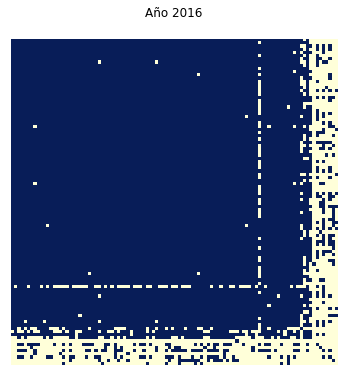

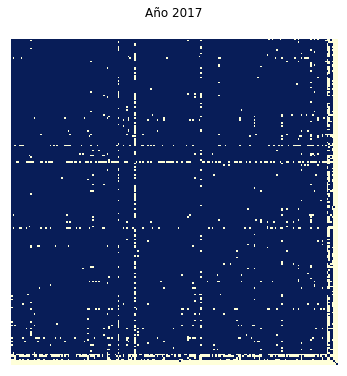

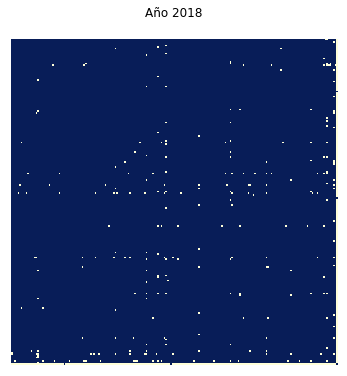

In [38]:
# El problema de graficar con nxviz es que crea su propio plot, con lo cual siempre queda afuera de cualquier subplot
# documentacion: https://coredump.guru/questions/44734622/plotting-networkx-and-nxvis-graph-side-by-side


# bicigrafo2015
m15 = nv.MatrixPlot(b15)
m15.draw()
plt.title('Año 2015')

# bicigrafo2016
m16 = nv.MatrixPlot(b16)
m16.draw()
plt.title('Año 2016')

# bicigrafo2017
m17 = nv.MatrixPlot(b17)
m17.draw()
plt.title('Año 2017')

# bicigrafo2018
m18 = nv.MatrixPlot(b18)
m18.draw() 
plt.title('Año 2018')

;

Se puede apreciar que, conforme avanzan los años la matriz de interacciones se expande cada vez mas. Esto parece tener cierto correlato con la forma o topologia del grafo. A continuacion se agregan algunas relaciones (la libreria no es muy comoda para graficar)

In [39]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec 

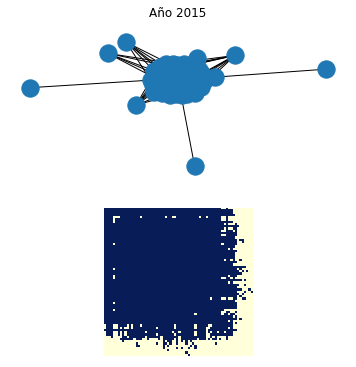

In [40]:
#2015
m = nv.MatrixPlot(b15)
m.draw()


gs = matplotlib.gridspec.GridSpec(2,1)
plt.gca().set_position(gs[1].get_position(plt.gcf()))
plt.gca().set_subplotspec(gs[1])

plt.subplot(gs[0])
nx.draw(b15)
plt.title('Año 2015', y=1.05)
plt.show()

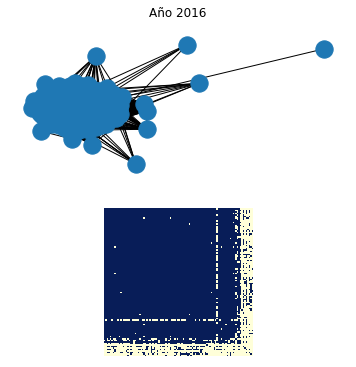

In [41]:
#2016
m2 = nv.MatrixPlot(b16)
m2.draw()


gs = matplotlib.gridspec.GridSpec(2,1)
plt.gca().set_position(gs[1].get_position(plt.gcf()))
plt.gca().set_subplotspec(gs[1])

plt.subplot(gs[0])
nx.draw(b16)
plt.title('Año 2016', y=1.05)

plt.show()

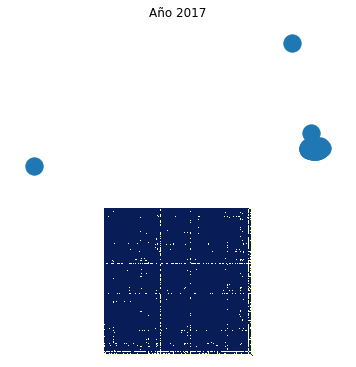

In [42]:
#2017
m3 = nv.MatrixPlot(b17)
m3.draw()


gs = matplotlib.gridspec.GridSpec(2,1)
plt.gca().set_position(gs[1].get_position(plt.gcf()))
plt.gca().set_subplotspec(gs[1])

plt.subplot(gs[0])
nx.draw(b17)
plt.title('Año 2017', y=1.05)

plt.show()

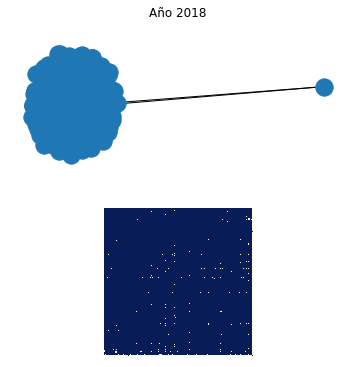

In [43]:
#2018
m4 = nv.MatrixPlot(b18)
m4.draw()


gs = matplotlib.gridspec.GridSpec(2,1)
plt.gca().set_position(gs[1].get_position(plt.gcf()))
plt.gca().set_subplotspec(gs[1])

plt.subplot(gs[0])
nx.draw(b18)
plt.title('Año 2018', y=1.05)

plt.show()

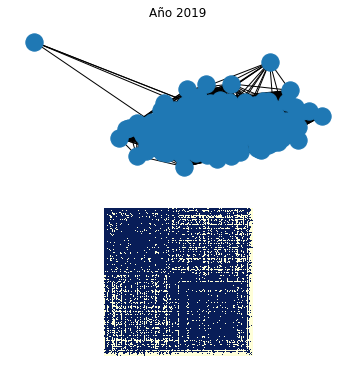

In [44]:
#2019
m5 = nv.MatrixPlot(b19)
m5.draw()


gs = matplotlib.gridspec.GridSpec(2,1)
plt.gca().set_position(gs[1].get_position(plt.gcf()))
plt.gca().set_subplotspec(gs[1])

plt.subplot(gs[0])
nx.draw(b19)
plt.title('Año 2019', y=1.05)

plt.show()

### Nodos mejor y peor conectados por año 

In [45]:
# Creamos una funcion para devolver un dataframe con el total de conexiones por nodo
def matriz(grafo):
    '''
    Devuelve un dataframe con la matriz de relaciones entre nodos
    '''
    
    conexiones = nx.to_numpy_matrix(grafo)
    df = pd.DataFrame(conexiones)
    
    est_label = []
    [est_label.append(n) for n,d in grafo.nodes(data=True)]
    df['TOTAL'] = df[:].sum()
    df['ESTACION'] = est_label
    return df

In [46]:
# Aplicamos la funcion a la red de 2015
dfm15 = matriz(b15)

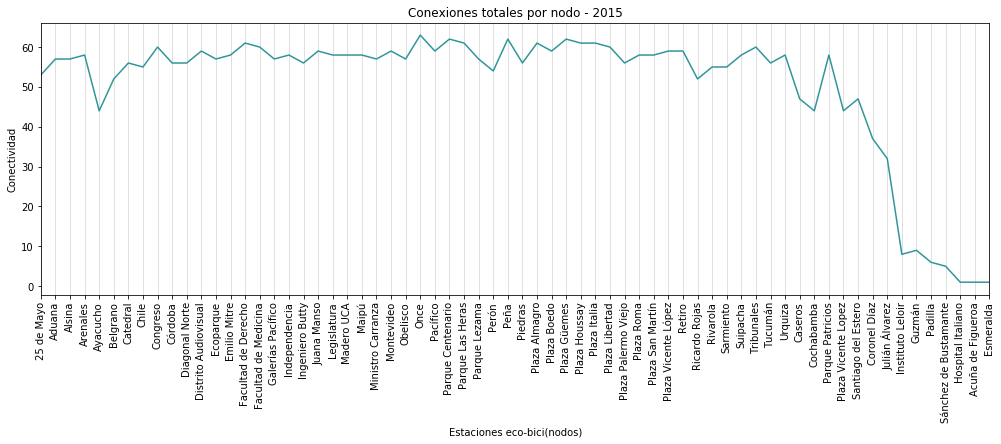

In [47]:
# Graficamos las conexiones por nodo
dfm15.plot(x='ESTACION', y='TOTAL',figsize=(17,5), color='#2F9599', legend=False)
plt.title('Conexiones totales por nodo - 2015')
plt.xlabel('Estaciones eco-bici(nodos)')
plt.ylabel('Conectividad')
plt.xticks(np.arange(len(dfm15)),dfm15['ESTACION'] , rotation=90)
plt.grid(axis='x', alpha=0.5);

In [48]:
# Aplicamos la funcion a la red de 2016
dfm16 = matriz(b16)

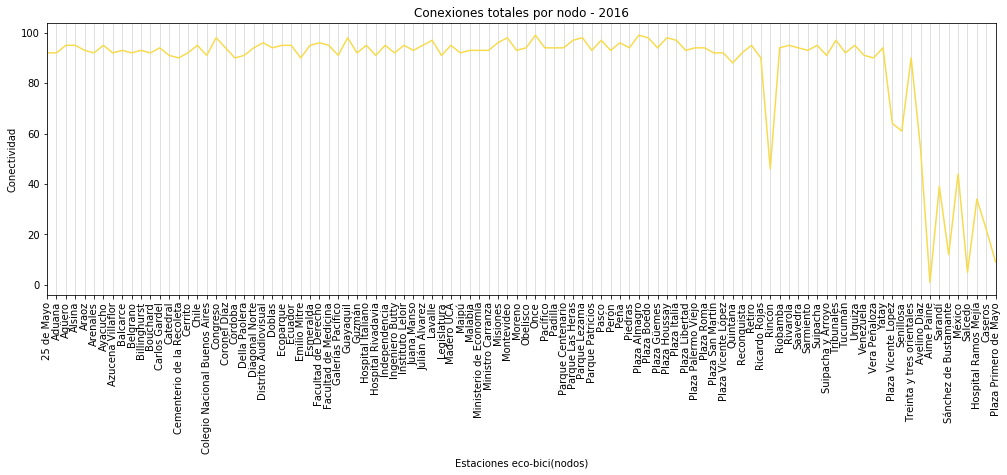

In [49]:
# Graficamos
dfm16.plot(x='ESTACION', y='TOTAL',figsize=(17,5), color='#F7DB4F', legend=False)
plt.title('Conexiones totales por nodo - 2016')
plt.xlabel('Estaciones eco-bici(nodos)')
plt.ylabel('Conectividad')
plt.xticks(np.arange(len(dfm16)),dfm16['ESTACION'] , rotation=90)
plt.grid(axis='x', alpha=0.5);

In [50]:
# Aplicamos la funcion a la red de 2017
dfm17 = matriz(b17)

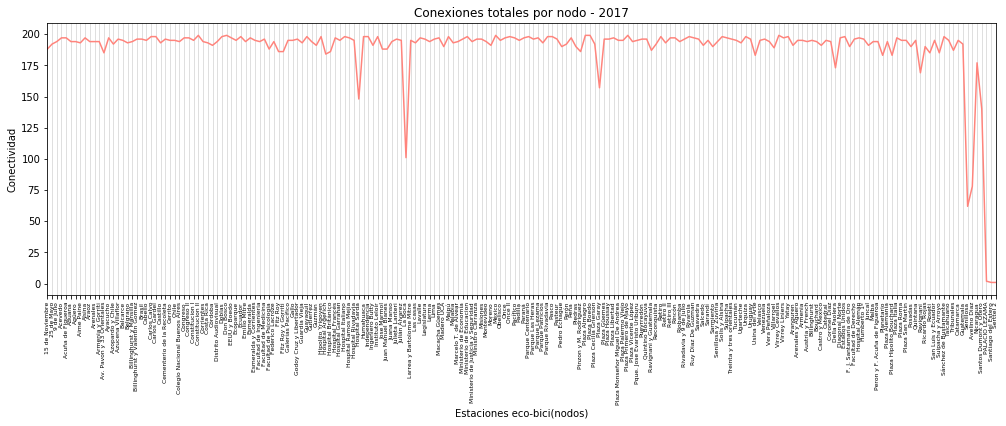

In [51]:
# Graficamos
dfm17.plot(x='ESTACION', y='TOTAL',figsize=(17,5),  color='#FF847C', legend=False)
plt.title('Conexiones totales por nodo - 2017')
plt.xlabel('Estaciones eco-bici(nodos)')
plt.ylabel('Conectividad')
plt.xticks(np.arange(len(dfm17)),dfm17['ESTACION'], fontsize=6, rotation=90)
plt.grid(axis='x', alpha=0.5);

In [52]:
# Aplicamos la funcion a la red de 2018
dfm18 = matriz(b18)

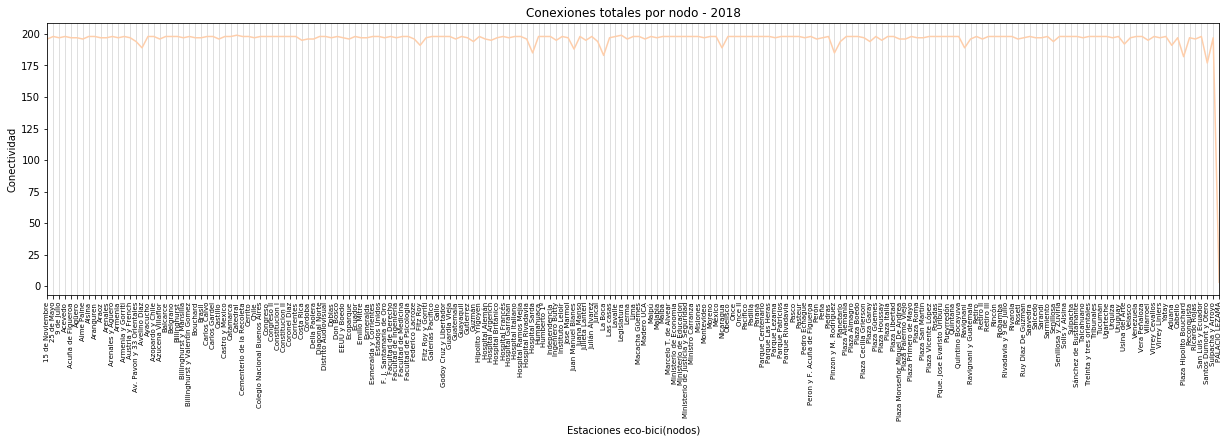

In [53]:
# Graficamos
dfm18.plot(x='ESTACION', y='TOTAL',figsize=(21,5), color='#FECEAB', legend=False)
plt.title('Conexiones totales por nodo - 2018')
plt.xlabel('Estaciones eco-bici(nodos)')
plt.ylabel('Conectividad')
plt.xticks(np.arange(len(dfm18)),dfm18['ESTACION'],fontsize=7, rotation=90)
plt.grid(axis='x', alpha=0.5);

En los ultimos años el nivel de conectividad entre nodos parece volverse más homogéneo (menos diferencias entre nodos). Excluimos de este análisis a la red de 2019 por tener sólo dos meses.

In [54]:
# # Aplicamos la funcion a la red de 2019
dfm19 = matriz(b19)

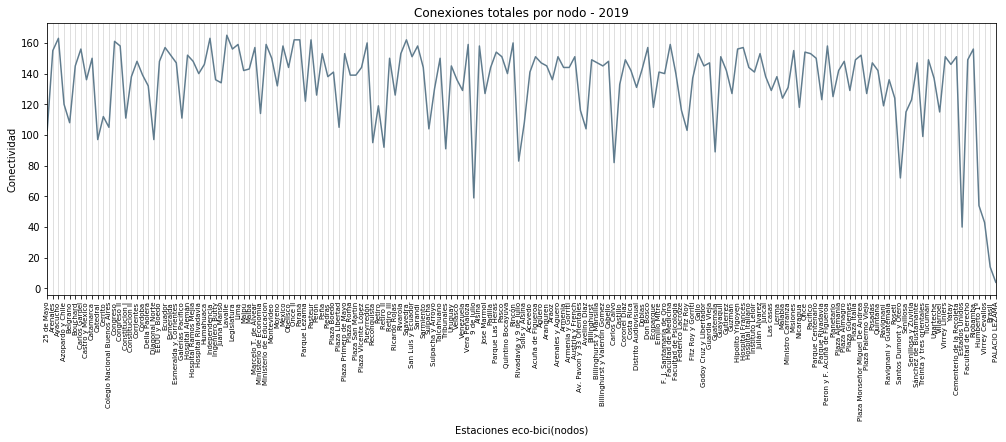

In [55]:
# Graficamos
dfm19.plot(x='ESTACION', y='TOTAL',figsize=(17,5), color='#607c8e', legend=False)
plt.title('Conexiones totales por nodo - 2019')
plt.xlabel('Estaciones eco-bici(nodos)')
plt.ylabel('Conectividad')
plt.xticks(np.arange(len(dfm19)),dfm19['ESTACION'] , fontsize=7, rotation=90)
plt.grid(axis='x', alpha=0.5);

In [56]:
# Creamos una funcion para devolver un dataframe con el node degree por grafo
def nd(grafo):
    '''
    Devuelve un df con el nodo y el node degree
    '''
    
    degree = []
    for n,d in grafo.nodes(data=True):
        degree.append(grafo.node[n]['degree']) 
    
    est_label = []
    for n,d in grafo.nodes(data=True):
        est_label.append(n)
    
    df = pd.DataFrame({'Estacion': est_label, 'Node Degree': degree})
    
    return df

In [57]:
# Por los dos caminos llegamos a numeros muy parecidos. La diferencia se puede deber a la indexacion respecto del primero.
dfm15[['ESTACION','TOTAL']].head()

ESTACION  TOTAL
0  25 de Mayo   53.0
1      Aduana   57.0
2      Alsina   57.0
3    Arenales   58.0
4    Ayacucho   44.0

In [58]:
# Creamos un dataframe con los 5 nodos de mayor degree para cada año
top5 = pd.concat([nd(b15).head(), nd(b16).head(), nd(b17).head(), nd(b18).head(), nd(b19).head()], axis=0)   

In [59]:
# Agregamos el año
top5['Año'] = [2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019]

In [60]:
estaciones['lon'], estaciones['lat'] = estaciones['geometry'].x, estaciones['geometry'].y

In [61]:
# Agregamos las coordeandas geograficas
top5 = pd.merge(top5, estaciones, left_on='Estacion', right_on='NOMBRE')

In [62]:
top5.columns

Index(['Estacion', 'Node Degree', 'Año', 'NOMBRE', 'DOMICILIO', 'IMAGEN',
       'AUTOMAT', 'OBSERV', 'NRO_EST', 'Horario', 'DIRE_NORM', 'geometry',
       'lon', 'lat'],
      dtype='object')

In [63]:
top5 = top5[['Estacion', 'Node Degree', 'Año', 'lon', 'lat']]

In [64]:
top5['Año'] = pd.to_datetime(top5['Año'],format='%Y').dt.year

In [65]:
# ESTO NO SIRVE. EL ZOOM ES CHOTO
px.scatter_geo(top5, lat = 'lat', lon='lon', color="Estacion", hover_name="Estacion", size="Node Degree",
               animation_frame="Año", locationmode = 'ISO-3', scope = 'south america', projection = 'mercator')

# VIAJES NETOS: PARTE 1

In [66]:
import folium

# Esta es la forma correcta de cargar un mapa con folium. En el ejemplo se agrega un marker
folium_map = folium.Map(location=[-34.6131500,-58.3772300],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
marker = folium.CircleMarker(location=[-34.6131500,-58.3772300])
marker.add_to(folium_map)

In [67]:
folium_map

In [68]:
# Funcion para devolver mes y hora para cada uno de los dataframes
def mes_hora(df):
    df["bici_Fecha_hora_retiro"] = pd.to_datetime(df["bici_Fecha_hora_retiro"])
    df["mes"] = df["bici_Fecha_hora_retiro"].map(lambda x: x.month)
    df["hora"] = df["bici_Fecha_hora_retiro"].map(lambda x: x.hour)
    return df

In [69]:
# Aplicamos la funcion para 2018
df18 = mes_hora(df18)

In [70]:
# Chequeamos el dataframe
df18.head(2)

bici_id_usuario bici_Fecha_hora_retiro  bici_tiempo_uso  \
0         107148.0    2018-12-31 23:56:42             39.0   
1         140759.0    2018-12-31 23:40:14              7.0   

  bici_nombre_estacion_origen  bici_estacion_origen  \
0               Parque Lezama                     6   
1   Cementerio de la Recoleta                   166   

  bici_nombre_estacion_destino  bici_estacion_destino  bici_sexo  bici_edad  \
0             Austria y French                  200.0  MASCULINO       27.0   
1                     Quintana                  115.0   FEMENINO       65.0   

   mes  hora  
0   12    23  
1   12    23

In [71]:
# Seleccionamos la latitud y longitud de cada estacion para asignarla a los df de recorridos
# Este dataframe sirve para todos los años
seleccion = estaciones[['NOMBRE','geometry' ]]
seleccion_b = seleccion.copy()
seleccion_b['x'], seleccion_b['y'] = estaciones.geometry.x, estaciones.geometry.y
# Dejamos afuera la gemetry
coordenadas = seleccion_b[['NOMBRE', 'x', 'y']]

In [72]:
# Funcion para devolver la latitud y la longitud de las estaciones de origen y destino para cada año
def coord_or_de(df):
    '''
    Devuelve latitud y longitud de las estaciones de origen y destino en un df integrado al original
    '''
    
    pre1 = pd.merge(df, coordenadas, left_on='bici_nombre_estacion_origen', right_on='NOMBRE')
    pre1.rename(columns={'x': 'lon_or', 'y': 'lat_or'}, inplace=True)

    pre2 = pd.merge(pre1, coordenadas, left_on='bici_nombre_estacion_destino', right_on='NOMBRE')
    pre2.rename(columns={'x': 'lon_de', 'y': 'lat_de'}, inplace=True)

    pre2.drop(columns=['NOMBRE_x','NOMBRE_y' ], inplace=True)
    
    return pre2  

In [73]:
# Aplicamos la funcion para 2018
df181 = coord_or_de(df18)

In [74]:
# Vemos que ahora el df tiene las coordenadas de la estacion de origen y de destino.
# Esto es un requisito para correr la funcion 'get_trip_counts_by_hour' que se arma abajo
df181.head(2)

bici_id_usuario bici_Fecha_hora_retiro  bici_tiempo_uso  \
0         107148.0    2018-12-31 23:56:42             39.0   
1         412129.0    2018-12-19 16:59:36             60.0   

  bici_nombre_estacion_origen  bici_estacion_origen  \
0               Parque Lezama                     6   
1               Parque Lezama                     6   

  bici_nombre_estacion_destino  bici_estacion_destino  bici_sexo  bici_edad  \
0             Austria y French                  200.0  MASCULINO       27.0   
1             Austria y French                  200.0  MASCULINO       28.0   

   mes  hora     lon_or     lat_or     lon_de     lat_de  
0   12    23 -58.369112 -34.628747 -58.403764 -34.588639  
1   12    16 -58.369112 -34.628747 -58.403764 -34.588639

In [75]:
# Funcion para conseguir la cantidad de viajes netos por hora entre 'salidas de' y 'llegadas a' la estacion
def get_trip_counts_by_hour(df, hora):
    
    '''
    Devuelve un df con la cantidad neta (entrantes y salientes) de viajes por estacion
    ...
    
    Argumentos:
    ----------
    df: dataframe con las coordenadas de la estacion de origen y destino
    hora: la hora que se desea analizar
    
    '''
    
    # arma un df por estacion con su localizacion correspondiente
    locations = df.groupby("bici_estacion_origen").first()
    locations = locations.loc[:, ["lat_or",
                              "lon_or",
                              "bici_nombre_estacion_origen"]]
    
    # selecciona hora del dia
    subset = df[df["hora"]==hora]
    
    # cuenta la cantidad de salidas o viajes iniciados por estacion de origen
    departure_counts =  subset.groupby("bici_estacion_origen").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departure Count"]
    
    # cuenta la cantidad de llegadas o viajes finalizados por estacion de destino
    arrival_counts =  subset.groupby("bici_estacion_destino").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]

    # une la cantidad de salidas y llegadas por estacion (location)
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

In [76]:
# Asi deberia quedar el dataframe
get_trip_counts_by_hour(df181, 9).head()

Departure Count     lat_or     lon_or  \
bici_estacion_origen                                          
1                                1031 -34.583580 -58.391855   
2                                1803 -34.593036 -58.374225   
3                                 517 -34.611689 -58.368322   
4                                 814 -34.602168 -58.368354   
5                                1049 -34.580575 -58.420399   

                     bici_nombre_estacion_origen  Arrival Count  
bici_estacion_origen                                             
1                            Facultad de Derecho            873  
2                                         Retiro            917  
3                                         Aduana            562  
4                                     Plaza Roma           1371  
5                                   Plaza Italia            755

In [77]:
# Funcion para plotear en un mapa las estacinoes graduadas por cantidad neta de viajes
def plot_station_counts(trip_counts):
    
    '''
    Devuelve un mapa navegable con la cantidad de estaciones graduadas por cantidad neta de viajes
    ...
    Argumentos
    ----------
    trip_counts: dataframe con la cantidad de viajes salientes y entrantes por estacion
    '''
    
    # genera el mapa base (Ciudad de Buenos Aires). Con el width se regula el extent del layer
    folium_map = folium.Map(location=[-34.6004687,-58.4009038],
                            zoom_start=12,
                            tiles="CartoDB dark_matter",
                            width='100%')

    # loop sobre las filas del df de cantidad de viajes
    for index, row in trip_counts.iterrows():
        # calcula cantidad de viajes netos
        net_departures = (row["Departure Count"]-row["Arrival Count"])
        
        # funcionalidad de folium: genera un pop-up con un on-click en el punto
        popup_text = "{}<br> total arrivals: {} <br> total departures: {}<br> net departures: {}"
        popup_text = popup_text.format(row["bici_nombre_estacion_origen"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)
        
        # graduacion del punto segun la cantidad neta de viajes
        radius = net_departures/20
        
        # colorea cada punto segun condicion. Dejo los otros colores del codigo fuente. 
        # si es mayor a 0 hubieron mas salidas que llegadas
        if net_departures>0:
            # color="#FFCE00" # orange
            # color="#007849" # green
            color="#E37222" # tangerine
        else:
            # color="#0375B4" # blue
            # color="#FFCE00" # yellow            
            color="#0A8A9F" # teal
        
        # agrega el punto sobre el mapa
        folium.CircleMarker(location=(row["lat_or"],
                                      row["lon_or"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

In [78]:
# ...probamos la funcion para estimar cantidad neta de viajes para 2018
nueve = get_trip_counts_by_hour(df181, 9)
dioch = get_trip_counts_by_hour(df181, 18)

####  PATRONES DE "MIGRACION" POR HORA: VIAJES NETOS (ENTRANTES VS SALIENTES) DE CADA ESTACION

Los siguientes mapas muestran los viajes netos para cada hora del día. Los puntos naranjas muestran, de forma graduada, las estaciones en las que (para la hora indicada) la cantidad de salidas fueron mayores que la cantidad de llegadas.

De esta manera, se puede ver de alguna manera, de dónde vienen o hacia dónde van los usuarios del sistema público de bicicletas en cada momento del día. 

In [79]:
# Saliendo de casa: mayor cantidad de salidas desde diversos puntos de la ciudad
plot_station_counts(nueve)

In [80]:
# Saliendo del trabajo: mayor cantidad de salidas con concentracion en un eje (microcentro-norte y sur. En Palermo hay bocha tb.)
plot_station_counts(dioch)

Como conclusión de estos mapas, se puede ver que (según la hora del día), hay zonas de la ciudad con mayor cantidad de salidas o llegadas.

# VIAJES NETOS: PARTE2

### PATRONES DE MOVILIDAD Y DENSIDAD DE TRAFICO POR ZONA 

In [81]:
from PIL import Image, ImageDraw
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters

La función 'get_kernel' se crea para dar un "efecto de brillo" donde hay una mayor intersección de líneas. 
Para eso, se crea un kernel (suerte de ponderador) con el que se multiplican los pixeles de la imagen en una operación matricial. En este artículo se detalla un poco mejor: 

https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [82]:
# Esta funcion se crea para crear un "efecto de brillo" donde hay una mayor intersección de líneas. 
# Para eso, se crea un kernel que se aplica a un un "convolution filter" ("cómo la forma de una función es modificada por otra") 

def get_kernel(kernel_size, blur=1/20, halo=.001):
    """
    Crea un (n*2+1)x(n*2+1) numpy array.
    El output se usa como kernel para el convolution filter.
    """
    
    # genera una grilla de x e y
    x, y = np.mgrid[0:kernel_size*2+1, 0:kernel_size*2+1]
    
    center = kernel_size + 1  # centro del pixel
    r = np.sqrt((x - center)**2 + (y - center)**2)  # distancia desde el centro
    
    # se crea el kernel. Este se puede ir ajustando conforme el efecto que se quiera dar
    kernel = np.exp(-r/kernel_size/blur) + (1 - r/r[center,0]).clip(0)*halo
    return kernel

In [83]:
def add_lines(image_array, xys, width=1, weights=None):
    """
    Une un set de coordenadas x e y, agregando líneas en un array de valores donde se creara una imagen.
    Inicialmente, "image_array" es una matriz de ceros.
    ...
    Argumentos:
    ----------
    width: ancho de las lineas
    weights: [], lista opcional de multiplicadores para cada linea. 
    """
    
    # loopea sobre las lineas
    for i, xy in enumerate(xys):  
        # crea una nueva imagen con escala de grises
        image = Image.new("L",(image_array.shape[1], image_array.shape[0]))
        
        # dibuja la linea
        ImageDraw.Draw(image).line(xy, 200, width=width)
        
        # traduce una nueva imagen como un array con valores
        new_image_array = np.asarray(image, dtype=np.uint8).astype(float)
        
        # aplica los pesos. Aca deberia suceder la operacion matricial donde se multiplican el array de pixeles por el "w"
        if weights is not None:
            new_image_array *= weights[i]
            
        # se agrega la nueva image_array a la existente
        image_array += new_image_array

    # se crea la convolve image. 
    new_image_array = scipy.ndimage.filters.convolve(image_array, get_kernel(width*4)) 
    return new_image_array

In [84]:
def to_image(array, hue=.62):
    '''Convierte un array de floats en uno con valores RGB usando colormap'''
    
    # aplica funcion de saturacion
    image_data = np.log(array + 1)
    
    # crea un colormap. Estos valores se pueden ajustar a gusto para plotear
    saturation_values = [[0, 0], [1, .68], [.78, .87], [0, 1]]
    colors = [hsv_to_rgb([hue, x, y]) for x, y in saturation_values]
    cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
    
    # aplica el colormap
    out = cmap(image_data/image_data.max())
    
    # convierte a 8-bit integer
    out = (out*255).astype(np.uint8)
    return out

In [85]:
# Se setean latitudes minimas y maximas para cuadrar la imagen
min_lat = df181["lat_or"].min()
max_lat = df181["lat_or"].max()
max_lon = df181["lon_de"].max()
min_lon = df181["lon_de"].min()

# Esta funcion se aplica en la siguiente (row_to_pixel)
def latlon_to_pixel(lat, lon, image_shape):
    '''
    Convierte los valores de latitud y longitud en pixel
    '''
    # longitud a pixel (ajustar data a la imagen)
    # duda: como pueden funcionar las latitudes y longitudes maximas y minimas si estan definidas por fuera de la funcion?
    delta_x = image_shape[1]/(max_lon - min_lon)
    
    # latitud a pixel (maintain aspect ratio)
    delta_y = delta_x/np.cos(lat/360*np.pi*2)
    pixel_y = (max_lat-lat)*delta_y
    pixel_x = (lon-min_lon)*delta_x
    return (pixel_y,pixel_x)


def row_to_pixel(row,image_shape):
    """
    Convierte cada fila del dataframe (cada viaje) a coordenadas para el pixel de las estaciones de salida y llegada (punto)
    """
    start_y, start_x = latlon_to_pixel(row["lat_or"], 
                                       row["lon_or"], image_shape)
    end_y, end_x = latlon_to_pixel(row["lat_de"], 
                                   row["lon_de"], image_shape)
    xy = (start_x, start_y, end_x, end_y)
    return xy

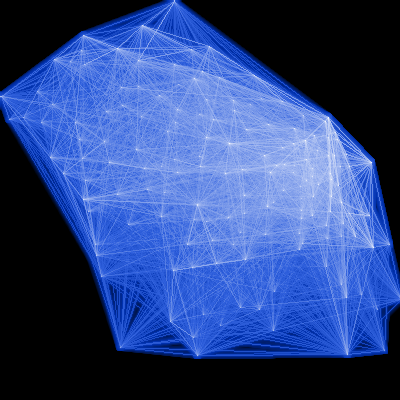

In [86]:
# Se define una hora especifica para el patron de movilidad. En este caso, las 9 a.m.
paths = df181[df181.hora==9]

# se puede optar por visualizar menos datos (tarda en correr)
#paths = paths.iloc[:3000,:]

# genera una matriz de ceros de 400*400. Esta resolucion se puede ajustar (le va a dar el tamaño final a la imagen).
image_data = np.zeros((400,400))

# se aplica la funcion "row_to_pixel" para generar las coordenadas para cada pixel donde hay un punto de partida y llegada
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]

# se dibujan las lineas con la segunda funcion que creamos antes ('add_lines')
image_data = add_lines(image_data, xys, weights=None, width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")

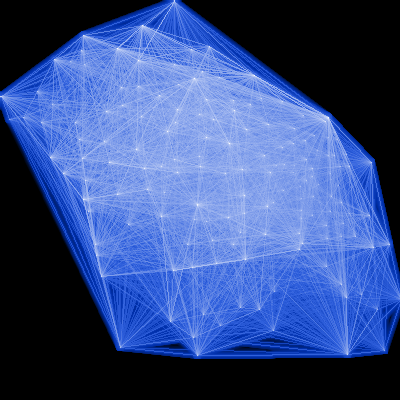

In [87]:
# Probamos con otro pattern de viaje: a las 18hs
paths = df181[df181.hora==18]

# matriz de ceros
image_data = np.zeros((400,400))

# coordenadas para los pixeles
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]

# dibuja lineas
image_data = add_lines(image_data, xys, weights=None, width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")

#### VIAJES UNICOS: AGRUPACION DE VIAJES INDIVIDUALES SEGUN ORIGEN Y DESTINO

Se consideran los recorridos únicos agrupando todos los viajes según conjuntos (estacion-linea-estacion) de partida y llegada: estos son los patrones únicos de viaje.

In [88]:
# se hace una lista con la ubicacion (latitud y longitud) para el id de cada estacion
# no queda claro por qué usa un promedio
ubicacion = df181.groupby("bici_estacion_origen").mean()
ubicacion = ubicacion.loc[:,["lat_or", "lon_or"]]

# agrupa cada par único de "estacion de salida"/"estacion de llegada" y cuenta para cada uno la cantidad de viajes
df181["path_id"] = [(id1,id2) for id1,id2 in zip(df181["bici_estacion_origen"], 
                                                     df181["bici_estacion_destino"])]
paths = df181[df181["hora"]==9].groupby("path_id").count().iloc[:,[1]] 
paths.columns = ["Trip Count"]

# se seleccionan patrones o pares de estaciones con más de "n" (a definir) viajes
paths = paths[paths["Trip Count"]>5]
paths["bici_estacion_origen"] = paths.index.map(lambda x:x[0])
paths["bici_estacion_destino"] = paths.index.map(lambda x:x[1])
paths = paths[paths["bici_estacion_origen"]!=paths["bici_estacion_destino"]]

# se joinea la latitud y la longitud a la nueva tabla de viajes por patrones unicos
paths = paths.join(ubicacion,on="bici_estacion_origen")
ubicacion.columns = ["lat_de","lon_de"]
paths = paths.join(ubicacion,on="bici_estacion_destino")
paths.index = range(len(paths))

paths.shape

(4518, 7)

In [89]:
def get_image_data(paths, min_count=0, max_count=None):
    # matriz de array (zero para pixeles)
    image_data = np.zeros((400*2,400*2))
    
    # genera coordenadas para los pixeles de los puntos de partida y llegada
    if max_count is None:
        max_count = paths["Trip Count"].max()+1
    selector = (paths["Trip Count"]>= min_count) & (paths["Trip Count"]< max_count)
    # aplica la funcion "row_to_pixel" en una comprehension list. 
    xys = [row_to_pixel(row, image_data.shape) for i, row in paths[selector].iterrows()]

    # dibuja las lineas
    image_data = add_lines(image_data, xys, weights=paths["Trip Count"], width = 1)
    return image_data

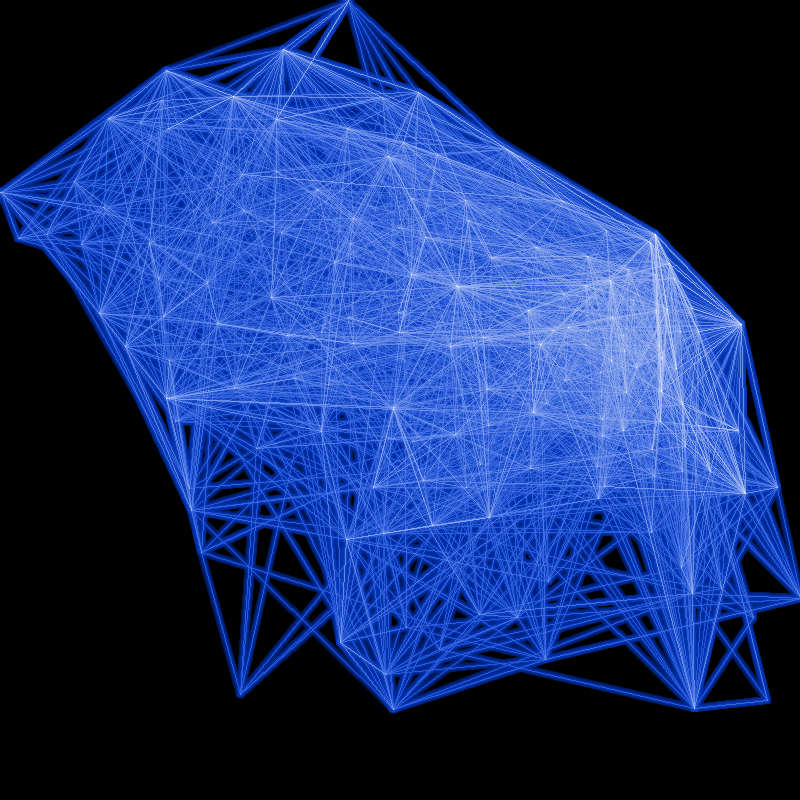

In [90]:
# patrones unicos de viaje
Image.fromarray(to_image(get_image_data(paths)*10)[:,:,:3],mode="RGB")

In [91]:
# Esta funcion tiene un objetivo de representacion grafica. 
# HSV es una medida de saturación
def add_alpha(image_data):
    """
    Uses the Value in HSV as an alpha channel. 
    This creates an image that blends nicely with a black background.
    """
    
    # get hsv image
    hsv = rgb_to_hsv(image_data[:,:,:3].astype(float)/255)
    
    # create new image and set alpha channel
    new_image_data = np.zeros(image_data.shape)
    new_image_data[:,:,3] = hsv[:,:,2]
    
    # set value of hsv image to either 0 or 1.
    hsv[:,:,2] = np.where(hsv[:,:,2]>0, 1, 0)
    
    # combine alpha and new rgb
    new_image_data[:,:,:3] = hsv_to_rgb(hsv)
    return new_image_data

In [92]:
# crear el mapa
folium_caba = folium.Map(location=[-34.6004687,-58.4009038],
                         zoom_start=12,
                         tiles="CartoDB dark_matter",
                         width='100%')

# aplica la funcion "add_alpha"
map_overlay = add_alpha(to_image(image_data*10))

# compute extent of image in lat/lon
aspect_ratio = map_overlay.shape[1]/map_overlay.shape[0]
delta_lat = (max_lon-min_lon)/aspect_ratio*np.cos(min_lat/360*2*np.pi)

# crea la imagen
img = folium.raster_layers.ImageOverlay(map_overlay,
                           bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                           opacity = 1,
                           name = "Paths")

# agrega la imagen al mapa junto a un selector de capas
img.add_to(folium_caba)
folium.LayerControl().add_to(folium_caba)

# plotear el mapa
folium_caba

In [93]:
# Crear nuevo mapa
folium_caba_beta = folium.Map(location=[-34.6004687,-58.4009038],
                         zoom_start=12,
                         tiles="CartoDB dark_matter",
                         width='100%')

# Lista para definir umbrales para "cantidad de viajes por recorrido unico"
thresholds = [5,15,25]

for i,t in enumerate(thresholds):
    upper = thresholds[i+1] if i<len(thresholds)-1 else None
    image_data = get_image_data(paths, t, upper)
    name = "{} < Num. Trips < {}".format(t,"max" if upper is None else upper)

    map_overlay = add_alpha(to_image(image_data*10))
    delta_lat = (max_lon-min_lon)/map_overlay.shape[1]*map_overlay.shape[0]*np.cos(min_lat/360*2*np.pi)
    img = folium.raster_layers.ImageOverlay(map_overlay,
                               bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                               name = name)

    # agrega imagen al mapa
    img.add_to(folium_caba_beta)

# selector de capas    
lc = folium.LayerControl().add_to(folium_caba_beta)

folium_caba_beta

In [94]:
# Hay 4518 patrones de viaje o conexiones entre nodos
paths.sort_values(by='Trip Count', ascending=False).head()

Trip Count  bici_estacion_origen  bici_estacion_destino     lat_or  \
1808         242                    61                  137.0 -34.609533   
103          225                     4                   26.0 -34.602168   
61           183                     2                   48.0 -34.593036   
3529         180                   135                  131.0 -34.596903   
96           161                     3                   79.0 -34.611689   

         lon_or     lat_de     lon_de  
1808 -58.370238 -34.616373 -58.366874  
103  -58.368354 -34.601447 -58.363008  
61   -58.374225 -34.605938 -58.370999  
3529 -58.379168 -34.592293 -58.373614  
96   -58.368322 -34.612167 -58.363373

In [95]:
len(paths)

4518

# VIAJES NETOS: PARTE 3 (VISUALIZACION DINAMICA)

In [96]:
from PIL import Image, ImageDraw, ImageFont
from folium.vector_layers import path_options
from folium import plugins
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters
import time
import datetime
import sys
import os.path
import io

In [300]:
#! pip install selenium

In [303]:
#! pip install --upgrade git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to c:\users\federico\appdata\local\temp\pip-req-build-x7yc106x
  Stored in directory: C:\Users\Federico\AppData\Local\Temp\pip-ephem-wheel-cache-h0lytwgt\wheels\1e\e1\75\ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
  Found existing installation: folium 0.7.0
    Uninstalling folium-0.7.0:
      Successfully uninstalled folium-0.7.0


  Running command git clone -q https://github.com/python-visualization/folium 'C:\Users\Federico\AppData\Local\Temp\pip-req-build-x7yc106x'


In [97]:
import os
os.environ["PATH"] += os.pathsep + "."

In [98]:
# Funcion para calcular la cantidad de viajes en un tiempo intermedio (entre dos horarios)
def interpolate(df1, df2, x):
    '''
    Devuelve un promedio ponderado de la cantidad de viajes (Arrivos y Salidas) entre dos dataframes 
    correspondientes a dos horas diferentes. 
    ...
    
    Argumentos:
    ----------
    df1 = Dataframe con cantidad de arrivos y salidas calculados para una hora específica
    df2 = Dataframe con cantidad de arrivos y salidas calculados para un horario posterior
    x   = Resto decimal del horario del df1
    '''
    
    # 1 corresponde al entero de la hora inicial, y x al resto en decimales
    df = df1 * (1 - x) + df2 * x
    return df.replace(np.nan, 0)


def get_trip_counts_by_minute(float_hour, data):
    '''
    Devuelve un df con la cantidad de viajes (Arrivos y Salidas) interpolados para cualquier momento del dia, a partir
    de la cantidad de viajes por hora.

    '''    
    columns = ["lat_or",
               "lon_or",
               "Departure Count",
               "Arrival Count"]
    
    # Cantidad de viajes para una hora. Por ejemplo, a las 9:00hs
    df1 = get_trip_counts_by_hour(data, int(float_hour))
    # Cantidad de viajes para hora + 1. Por ejemplo, a las 10:00hs
    df2 = get_trip_counts_by_hour(data, int(float_hour) + 1)
    
    # La funcion "interpolate" usa el resto (valor decimal) de la "float hour" que se le pasa como parametro. Por ejemplo,
    # si se le pasa 9.5, sera 0.5
    df = interpolate(df1.loc[:,columns], 
                     df2.loc[:,columns], 
                     float_hour % 1)
    
    df["bici_nombre_estacion_origen"] = df1["bici_nombre_estacion_origen"]
    return df

In [99]:
# Vemos la cantidad de viajes para un tiempo intermedio. En este caso, 9.5 equivaldria al intermedio entre 9 y las 10
# ... es decir, las nueve y media.
plot_station_counts(get_trip_counts_by_minute(9.5, df181))

In [100]:
def go_arrivals_frame(i, hour_of_day, save_path, bike_data):
    
    '''
    Devuelve una imagen con la captura del mapa generado por la funcion "plot_station_counts"
    ...
    
    Argumentos:
    ----------
    i:            hora de inicio (este argumento esta pensado para ir loopeando dentro de un for)
    hour_of_day:  hora final (hora de calculo para la funcion "get_trip_counts_by_minute")
    save_path:    carpeta de destino para guardar las fotos
    bike_data:    data frame para calcular los viajes netos en la funcion "get_trip_counts_by_minute"
    '''
    
    # crea el mapa con cantidad de viajes (promedio ponderado) entre dos horarios 
    data = get_trip_counts_by_minute(hour_of_day, bike_data)
    my_frame = plot_station_counts(data)
    
    # convierte el plot del mapa que hicimos para el promedio ponderado entre dos horarios en un archivo png como byte array
    png = my_frame._to_png()
    
    # crea las variables "hora" y "minutos" para agregar en la imagen del mapa
    hour = int(hour_of_day)
    minutes = int((hour_of_day % 1) * 60)
    
    # convierte al mapa dinamico en PIL (imagen)
    image = Image.open(io.BytesIO(png))
    draw = ImageDraw.ImageDraw(image)
    
    # carga la fuente. Dejo arial porque no me cargaba Roboto. Se puede cambiar
    font = ImageFont.truetype("arial.ttf", 30)
    
    # agrega a la foto del mapa la hora y los minutos
    draw.text((20,image.height - 50), 
              "hora: {:0>2}:{:0>2}h".format(hour, minutes),
              fill=(255, 255, 255), 
              font=font)
    
    # agrega a la foto del mapa el titulo
    draw.text((image.width - 400,20), 
              "Salidas y arribos netos por hora",
              fill=(255, 255, 255), 
              font=font)
    
    # convierte la foto del mapa en una imagen (PNG)
    filename = os.path.join(save_path, "frame_{:0>5}.png".format(i))
    image.save(filename, "PNG")
    return image

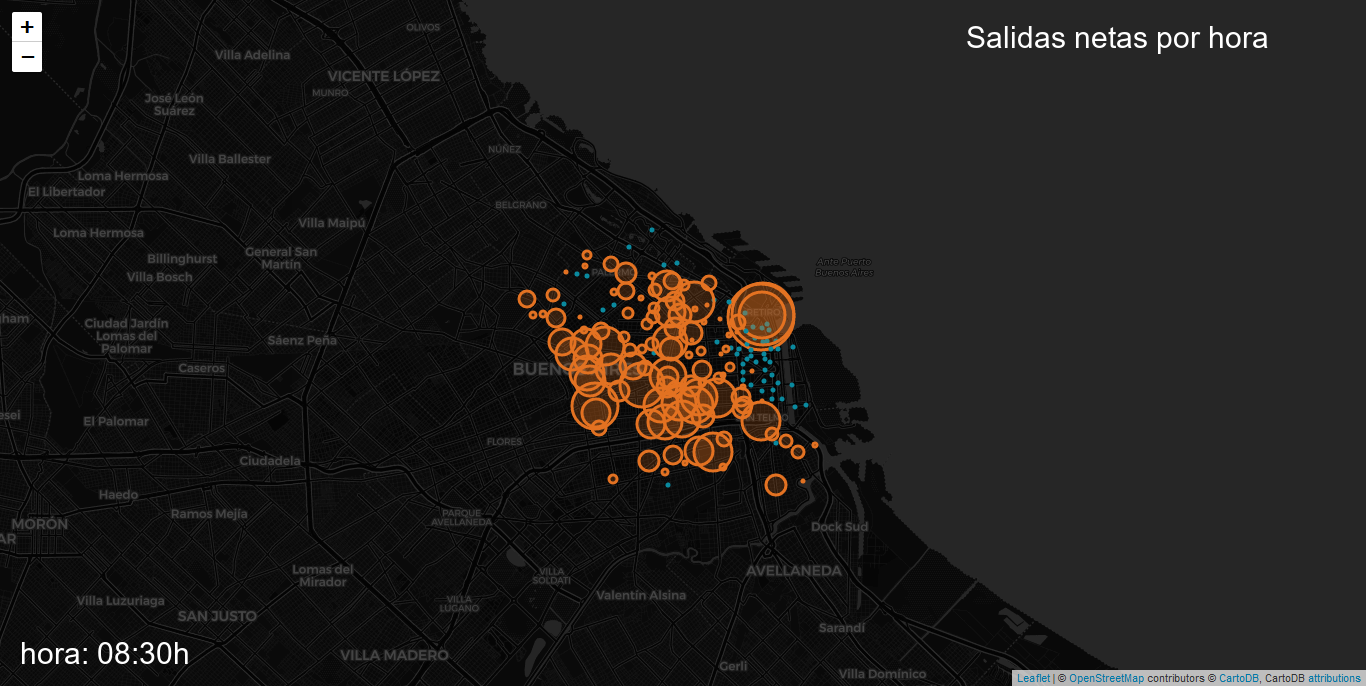

In [103]:
# Crea el directorio donde se van a guardan las fotos. Con esto hay que tener cuidado de no sobrescribir
dir_name = 'frames'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
go_arrivals_frame(1, 8.5, dir_name, df181)

In [104]:
arrival_times = np.arange(1, 24, .2)
for i, hour in enumerate(arrival_times):
    go_arrivals_frame(i, hour, "frames", df181)

In [ ]:
#!ffmpeg -r 10 -i frames/frame_%05d.png -c:v libx264 -vf fps=25 -crf 17 -pix_fmt yuv420p output.mp4

In [ ]:
# En command line corre mas rapido y no traba la notebook
#!ffmpeg -r 10 -i frames/frame_%05d.png -c:v libx264 -vf fps=25 -crf 17 -pix_fmt yuv420p biciviajes.mp4

### Matriz de accesibilidad 

...se señalan la cantidad de arcos mínimos que son necesarios recorrer para ir desde un nodo a cada uno de los restantes (Seguí Pons y Petrus Bey, 1991).

In [66]:
# Matrices de accesibilidad para cada grafo

ma15= pd.DataFrame(dict(nx.all_pairs_shortest_path_length(b15)))

ma16= pd.DataFrame(dict(nx.all_pairs_shortest_path_length(b16)))

ma17= pd.DataFrame(dict(nx.all_pairs_shortest_path_length(b17)))

ma18= pd.DataFrame(dict(nx.all_pairs_shortest_path_length(b18)))

ma19= pd.DataFrame(dict(nx.all_pairs_shortest_path_length(b19)))

1) El Número Asociado de Köning resulta ser el valor mayor de cada fila en la Matriz de Accesibilidad, dicho número da una idea de la accesibilidad que posee el nodo de referencia con relación al nodo más lejano topológicamente. Cuanto menor sea el valor del Número Asociado, mayor será la accesibilidad del nodo (Garrido Palacios, 1995).

In [67]:
# Generamos el nro de koning para cada grafo
NK15,NK16,NK17,NK18,NK19 = ma15.max(axis=0), ma16.max(axis=0), ma17.max(axis=0), ma18.max(axis=0), ma19.max(axis=0)

2) Índice de Shimbel: Shimbel = ∑ dxy

        se obtiene sumando los valores de cada fila de la Matriz de Accesibilidad Topológica, lo que muestra la cantidad de arcos a atravesar para ir desde un nodo a todos los demás del grafo(Garrido Palacios, 1995)

In [68]:
# Generamos el indice de shimbel para cada grafo
SH15,SH16,SH17,SH18,SH19 = ma15.sum(axis=0), ma16.sum(axis=0), ma17.sum(axis=0), ma18.sum(axis=0), ma19.sum(axis=0)

3) Indice de dispersion: Índice G = ∑ Shimbel

        mide el nivel de accesibilidad para el conjunto de la red, y se obtiene de la suma de todos los índices Shimbel del grafo (número de arcos que es preciso atravesar para llegar desde un nodo a los demás).

In [69]:
# Generamos el indice de dispersion ara cada grafo
G15, G16, G17, G18, G19 = SH15.sum(), SH16.sum(), SH17.sum(), SH18.sum(), SH19.sum()

4) Indice de Accesibilidad Media (IAM): IAM = Índice G / n

        determina un valor promedio de la accesibilidad en la red a partir del cociente entre, el índice G de Dispersión y el número de nodos existentes. Este promedio de la red permite comparar diferentes grafos, o ver dentro de una misma red la accesibilidad de cada nodo (índice de Shimbel) respecto a la media (índice G); los que superan el promedio, son los menos accesibles.

In [70]:
IAM15, IAM16 = round(G15/len(b15.nodes(data=True)),2), round(G16/len(b16.nodes(data=True)),2)

IAM17, IAM18 = round(G15/len(b17.nodes(data=True)),2), round(G18/len(b16.nodes(data=True)),2)

IAM19 = round(G19/len(b19.nodes(data=True)),2)

In [71]:
IAM15

80.58

In [104]:
import geopandas as gpd
import mplleaflet

In [105]:
# Shape de estaciones descargados de DataBA


In [107]:
estaciones

NOMBRE  \
0                    Facultad de Derecho   
1                                 Retiro   
2                                 Aduana   
3                             Plaza Roma   
4                          Parque Lezama   
5                           Plaza Italia   
6                               Obelisco   
7                               Congreso   
8                       Parque Las Heras   
9                    Puerto Madero - UCA   
10                            Tribunales   
11                   Plaza Vicente López   
12                                  Once   
13                              Pacífico   
14                         Plaza Houssay   
15        Legislatura (ex Plaza de Mayo)   
16                         Plaza Almagro   
17                         Independencia   
18                      Plaza San Martín   
19                  Distrito Audiovisual   
20                              Arenales   
21                              Suipacha   
22                                Alsina   
23                          Plaza Guemes   
24                           Juana Manso   
25                            Montevideo   
26                           Plaza Boedo   
27                     Parque Centenario   
28                      Parque Patricios   
29                                  Peña   
..                                   ...   
169                   San Luis y Ecuador   
170      Plaza Monseñor Miguel de Andrea   
171                       Estados Unidos   
172                              Pasteur   
173                       Plaza Alemania   
174               Facultad de Psicología   
175              Ministerio de Educación   
176                           Planetario   
177                          José Marmol   
178                      Castro y México   
179                      Virrey Cevallos   
180             Av Pavón y 33 Orientales   
181                            Catamarca   
182                           Talcahuano   
183                    Arenales y Aguero   
184  Perón y Francisco Acuña de Figueroa   
185                            Aranguren   
186                        Pedro Echague   
187                              Posadas   
188                     Parque Rivadavia   
189                          Plaza Garay   
190                               Juncal   
191                    Quintino Bocayuva   
192               Estados Unidos y Boedo   
193                       Hospital Sardá   
194                    Hospital Argerich   
195                          Congreso II   
196                               Roseti   
197                     Austria y French   
198                              La Boca   

                                             DOMICILIO  \
0         Av. Pres.Figueroa Alcorta y  Juan A.Bibiloni   
1          Av. Dr.Jose Ramos Mejia y Del Libertador Av   
2                        Av. Ing.Huergo y Av. Belgrano   
3                                   Lavalle y Bouchard   
4                             Av Martín García e Irala   
5                         Av. Santa Fe y Av. Sarmiento   
6        Av. 9 de Julio y Tte. Gral Juan Domingo Perón   
7              Av. Hipólito Yrigoyen y Virrey Ceballos   
8                                     Parque Las Heras   
9                                 Moreau de Justo 1500   
10                                          Tribunales   
11                                 Plaza Vicente López   
12                                      Plaza Miserere   
13                                            Pacífico   
14                                       Plaza Houssay   
15                                 Perú y Diagonal Sur   
16                                       Plaza Almagro   
17                      Av. Independencia y 9 de Julio   
18                                    Plaza San Martín   
19                                   Zapiola y Dorrego   
20                                  Arenales y Cerrito   
21                           

In [ ]:
# Creamos una lista de adyacencias> un diccionario por nodo (key) y una lista de nodos con los que conecta como value